# Heavy Traffic Indicators on I-94

The project is about analysis of westbound traffic on the east-west [I-94 Interstate Highway](https://en.wikipedia.org/wiki/Interstate_94) connecting the Great Lakes and northern Great Plains regions of the United States. We're going to analyze the dataset which can be found [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

In [2]:
import pandas as pd

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

print(traffic.head())
print(traffic.tail())
traffic.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

The dataset have 48,204 rows and 9 columns. There aren't any missing values in any column.

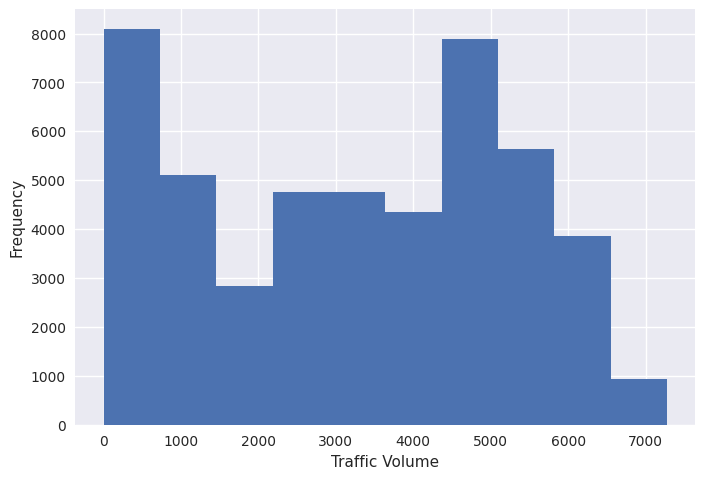

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn')

traffic['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.show()

traffic['traffic_volume'].describe()

Looking at the histogram and a few statistics about the `traffic_volume` column, we can make a few quick observations about the following:

- Over the six years (from `2012-10-02 09:00:00` to `2018-09-30 23:00:00`), the values ranged between 0 and 7,280.
- Average hourly traffic volume is equal to 3,260.
- Median hourly traffic volume is equal to 3,380 (value very close to the average).
- About 25% of the time, there were 1,193 or fewer cars passing the station each hour — this probably occurs during the night, or when a road is under construction.
- About 25% of the time, the traffic volume was four times as much (4,933 or more cars).
- Most typically, the hourly I-94 reported westbound traffic volume varies between 0 - 600 (first tallest bar), and between 4,400 - 5,000 (second tallest bar). The height of these bars indicates that we had about 8,000 hours when traffic volume was between 0 - 600, and about 8,000 hours when traffic volume was between 4,400 - 5,000.
- For most hours, traffic volume ranges between 0 - 6,500 cars — we see the tallest bars around this larger interval.
- Most uncommonly, hourly traffic volume goes over 6,500 cars.


We can suppose the values of traffic volume are influenced by daytime (typically lower traffic volume) and nigthtime ( higher traffic volume). We'll check our hypothesis in the course of the analysis.

## Daytime and Nighttime Influence

We'll start by dividing the dataset into two parts:
- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [4]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])    # transforms the column to 'datetime' type
traffic['hour'] = traffic['date_time'].dt.hour                 # gets the hour of every instance of the 'date_time' column

traffic['hour'].value_counts().sort_index()

0     2037
1     2049
2     2019
3     2025
4     2091
5     2063
6     2087
7     2079
8     2080
9     2018
10    2078
11    1952
12    1955
13    1905
14    1969
15    1934
16    1988
17    1933
18    1986
19    1961
20    1979
21    1982
22    1994
23    2040
Name: hour, dtype: int64

Now we're going to isolate the daytime data in `traffic_day` dataframe, and the nighttime data in `traffic_night` dataframe.

In [5]:
start_day = 7
end_day = 19

traffic_day = traffic.copy()[(traffic['hour'] >= start_day) & (traffic['hour'] < end_day)]
traffic_night = traffic.copy()[(traffic['hour'] < start_day) | (traffic['hour'] >= end_day)]

print(traffic_day.shape)
print(traffic_night.shape)

(23877, 10)
(24327, 10)


This significant difference in row numbers between day and night is due to a few hours of missing data.

Let's compare the traffic volume at night and during day.

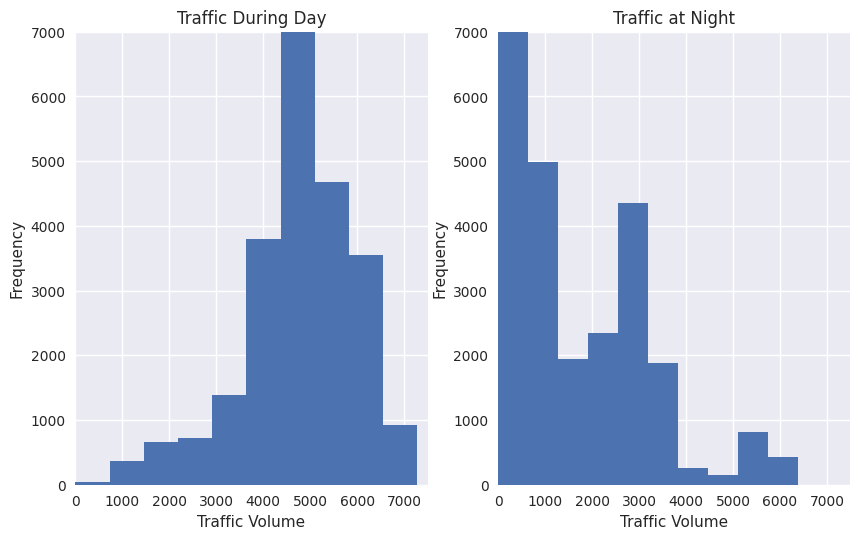

Traffic During Day:
count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


Traffic at Night:
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


In [6]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
traffic_day['traffic_volume'].plot.hist()
plt.title('Traffic During Day')
plt.xlabel('Traffic Volume')
plt.xlim([0, 7500])
plt.ylim([0, 7000])

plt.subplot(1, 2, 2)
traffic_night['traffic_volume'].plot.hist()
plt.title('Traffic at Night')
plt.xlabel('Traffic Volume')
plt.xlim([0, 7500])
plt.ylim([0, 7000])

plt.show()

print('Traffic During Day:')
print(traffic_day['traffic_volume'].describe())
print('\n')
print('Traffic at Night:')
print(traffic_night['traffic_volume'].describe())

### Daytime

The histogram of `traffic_volume` for day shows a left skewed distribution. This indicates that during day it's more likely that traffic will be heavy. Basic statistics confirm these observation:
- Average traffic volume is about 4,762.
- Median traffic volume is equal to 4,820.
- About 25% of the time, there were 4,252 cars or fewer passing the station each hour.
- About 25% of the time, there were 5,559 cars or more passing the station each hour.

### Nighttime

The histogram of `traffic_volume` for night shows a right skewed distribution. This indicates that at night it's more likely that traffic will be light. A glance at the basic statistics confirms these observation:
- Average traffic volume is about 1,785.
- Median traffic volume is equal to 1,287.
- About 25% of the time, there were 530 cars or fewer passing the station each hour.
- About 25% of the time, there were 2,819 cars or more passing the station each hour.

Now we're sure that traffic is light at night. As we remember, our goal is to find indicators of heavy traffic on I-94, so we're making a decision to only focus on the daytime data moving forward.

## Time Influence

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:
- Month
- Day of the week
- Time of day

### Time Indicators - Month

Firstly, we're going to get the average traffic volume for each month. The fastest way to do it is by using the `DataFrame.gropby()` method.

In [7]:
traffic_day['month'] = traffic_day['date_time'].dt.month
by_month = traffic_day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

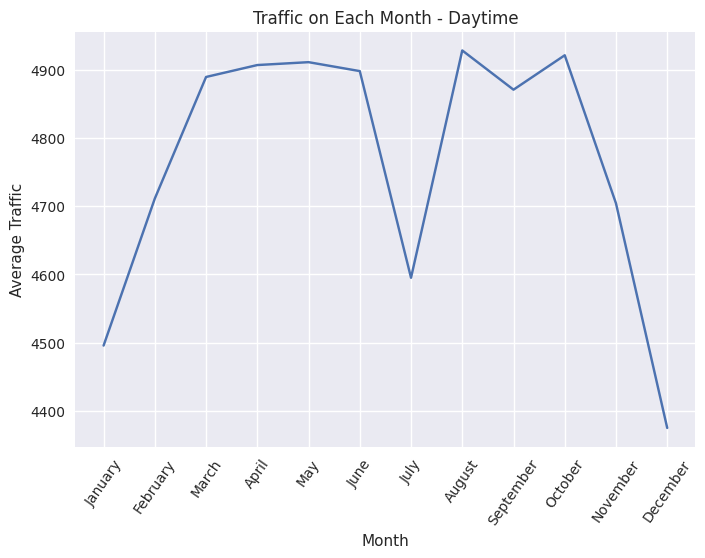

In [8]:
plt.plot(by_month['traffic_volume'])
plt.xticks(rotation=55,
           ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
           labels=['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Traffic on Each Month - Daytime')
plt.xlabel('Month')
plt.ylabel('Average Traffic')
plt.show()

The traffic is less intense during cold months (November – February), and much heavier during warmer months (March – October), with one exception: July. 

In [9]:
traffic_day['year'] = traffic_day['date_time'].dt.year

july_by_year = traffic_day[traffic_day['month'] == 7].groupby('year').mean()    # 7 is July
july_by_year['traffic_volume']

year
2013    4914.354054
2014    4871.598240
2015    4613.146226
2016    3924.923645
2017    4734.120301
2018    4586.899543
Name: traffic_volume, dtype: float64

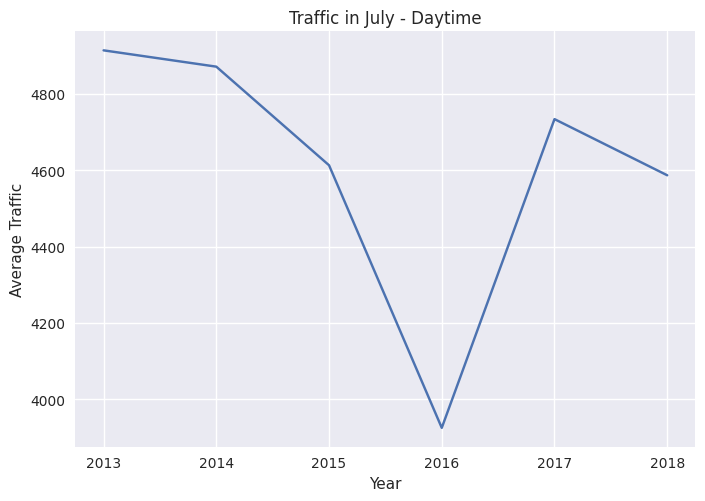

In [10]:
plt.plot(july_by_year['traffic_volume'])
plt.title('Traffic in July - Daytime')
plt.xlabel('Year')
plt.ylabel('Average Traffic')
plt.show()

In general, the traffic in July is heavy. We can see that there is a significant decrease in traffic volume in July 2016. It might be connected with [I-94/Hwy 29 interchange construction in Alexandria](https://www.voiceofalexandria.com/news/local/i-94-hwy-29-interchange-in-alexandria-2015-2016-construction/article_d40cd02a-fd8f-11e5-8bfe-fb60e0f43226.html).

### Time Indicators - Day of the Week

Now we'll continue with building line plots for another time unit: day of the week.

To get the traffic volume averages for each day of the week, we'll need to use the following code:

In [11]:
traffic_day['dayofweek'] = traffic_day['date_time'].dt.dayofweek
by_dayofweek = traffic_day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']   # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

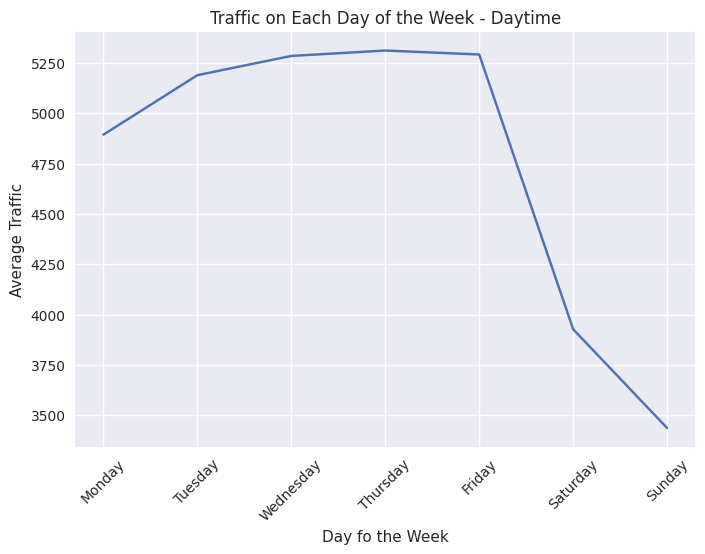

In [12]:
plt.plot(by_dayofweek['traffic_volume'])
plt.xticks(rotation=45,
            ticks=[0, 1, 2, 3, 4, 5, 6],
            labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Traffic on Each Day of the Week - Daytime')
plt.xlabel('Day fo the Week')
plt.ylabel('Average Traffic')
plt.show()

During business days (Monday - Friday) traffic volume is significantly heavier. Except for Monday, traffic is above 5,000 during these days. Traffic is much lighter during weekends (below 4,000).

### Time Indicators - Time of Day

Now we'll generate a line plot for the time of day. The weekends, however, will drag down the average values, so we'll look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [13]:
business_days = traffic_day.copy()[traffic_day['dayofweek'] <= 4]    # 4 == Friday
weekend = traffic_day.copy()[traffic_day['dayofweek'] >= 5]          # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


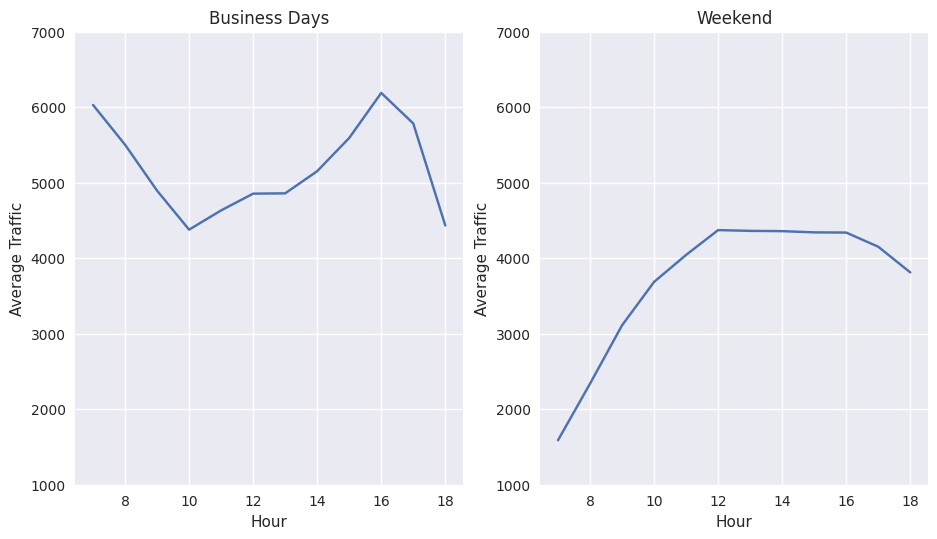

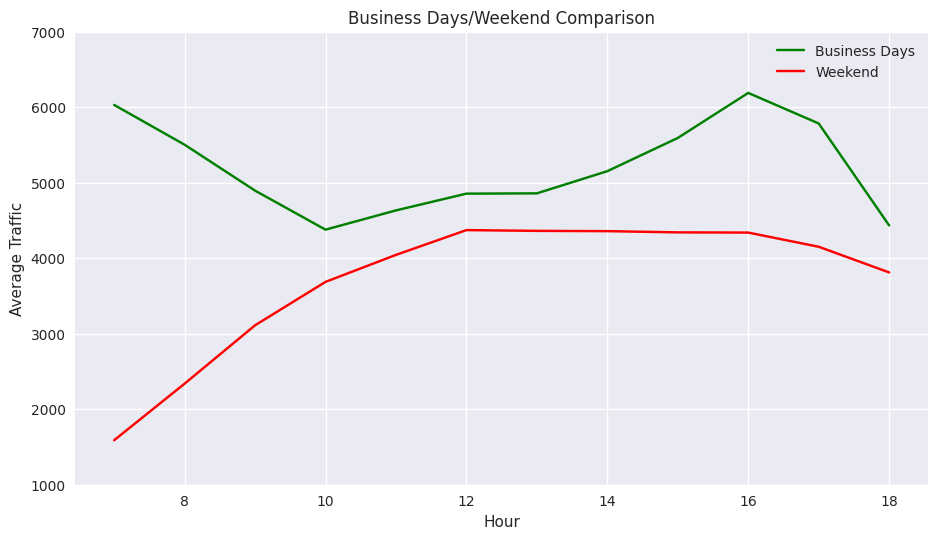

In [14]:
plt.figure(figsize=(11, 6))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Business Days')
plt.xlabel('Hour')
plt.ylabel('Average Traffic')
plt.ylim([1000, 7000])

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekend')
plt.xlabel('Hour')
plt.ylabel('Average Traffic')
plt.ylim([1000, 7000])

plt.show()

plt.figure(figsize=(11, 6))

plt.plot(by_hour_business['traffic_volume'], color='green', label='Business Days')
plt.plot(by_hour_weekend['traffic_volume'], color='red', label='Weekend')
plt.legend()
plt.title('Business Days/Weekend Comparison')
plt.xlabel('Hour')
plt.ylabel('Average Traffic')
plt.ylim([1000, 7000])

plt.show()

The traffic volume is higher in each hour during business days compared to the weekends. The rush hours on business days are around 7 and 16. Most people travel from home to work and back at these hours. Traffic volumes at rush hours are over 6,000.

On the other hand, during weekends heaviest traffic is in the middle of the day (between 12 and 16) with traffic volumes over 4,300. Still, these traffic volumes are below lowest traffic during budiness days. At 7 in the morning traffic volume is extremely low - only 1,600 cars.

Let's check if there are any significant differences for each business day and for each weekend day.

(1000.0, 7000.0)

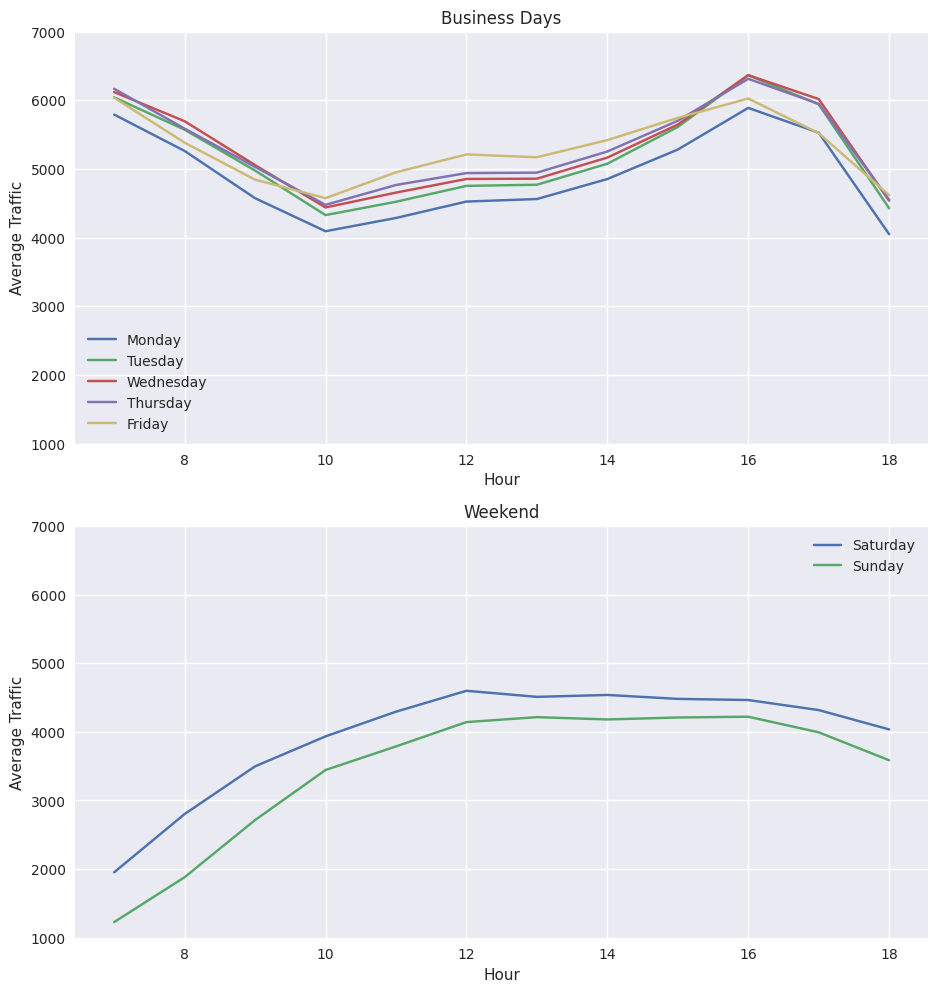

In [15]:
weekday_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

plt.figure(figsize=(11, 12))
#colors = ['red', 'green', 'indigo', 'yellow', 'tomato', 'aqua', 'blue']

plt.subplot(2, 1, 1)
for day in range(0, 5):
    weekday = traffic_day[traffic_day['dayofweek'] == day]
    plt.plot(weekday.groupby('hour').mean()['traffic_volume'], label=weekday_dict[day])
    
plt.legend()
plt.title('Business Days')
plt.xlabel('Hour')
plt.ylabel('Average Traffic')
plt.ylim([1000, 7000])
    
plt.subplot(2, 1, 2)
for day in range(5, 7):
    weekday = traffic_day[traffic_day['dayofweek'] == day]
    plt.plot(weekday.groupby('hour').mean()['traffic_volume'], label=weekday_dict[day])

plt.legend()
plt.title('Weekend')
plt.xlabel('Hour')
plt.ylabel('Average Traffic')
plt.ylim([1000, 7000])

We can see that plot lines for business days have similar shapes (with exception for Friday, but there's only a slight difference). In general, the lowest traffic is during Monday.

Plot lines for Saturday and Sunday are also similar to each other. During Saturday, in each hour, traffic is higher than during Sunday (500 - 1,000 difference).

### Time Indicators - Summary

We've found a few time-related indicators of heavy traffic:
- The traffic is heavier during warm months (March – October) compared to cold months (November – February).
- The traffic is significantly heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

In [16]:
traffic_day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
hour              0.172704
month            -0.022337
year             -0.003557
dayofweek        -0.416453
Name: traffic_volume, dtype: float64

The strongest correlation is between temperature and traffic volume with a value of +0.13. The other columns (`rain_1h`, `snow_1h`, `clouds_all`) don't show any strong correlation with `traffic_value`.

Let's generate a scatter plot to visualize the correlation between `temp` and `traffic_volume`.

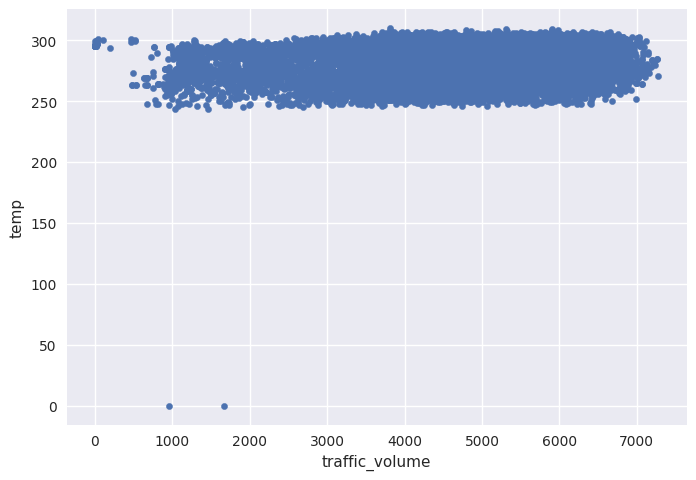

In [17]:
traffic_day.plot.scatter('traffic_volume', 'temp')

Two temperature values are messing up our plot. We have to get rid of these values from the plot.

(220.0, 330.0)

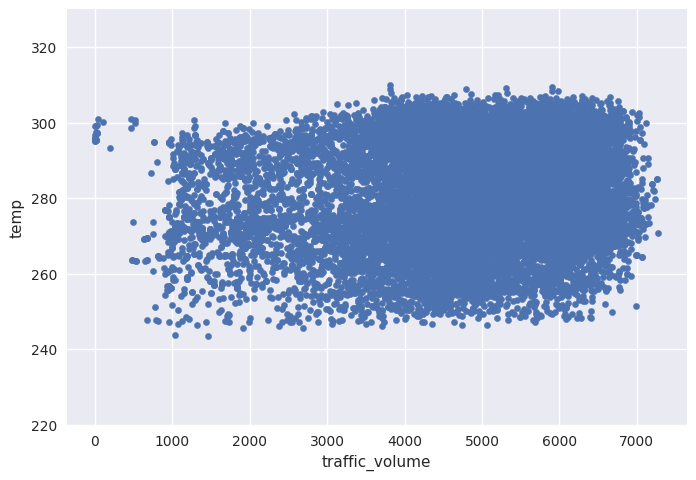

In [18]:
traffic_day.plot.scatter('traffic_volume', 'temp')
plt.ylim([220, 330])

Temperature doesn't look like a reliable indicator of heavy traffic.

Let's now look at the other weather-related columns: `weather_main` and `weather_description`.

### Weather Types

We're going to group the data by `weather_main` and look at the `traffic_volume` averages.

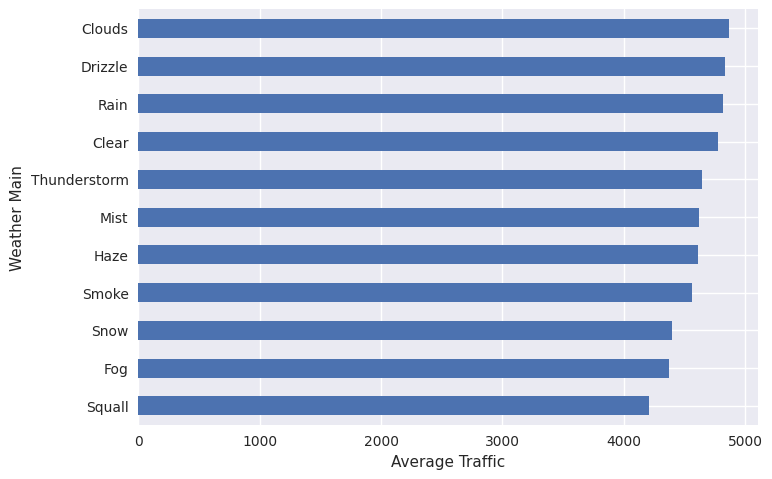

In [19]:
by_weather_main = traffic_day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].sort_values().plot.barh()
plt.xlabel('Average Traffic')
plt.ylabel('Weather Main')
plt.show()

There's no weather type where traffic volume exceeds 5,000 cars. Clearly smaller bars are for Squall, Snow and Fog. We can assume that these types of weather reduce the volume of traffic, because people drive more carefully.

Now let's group out dataset by `weather_description`, which has a more granular weather classification.

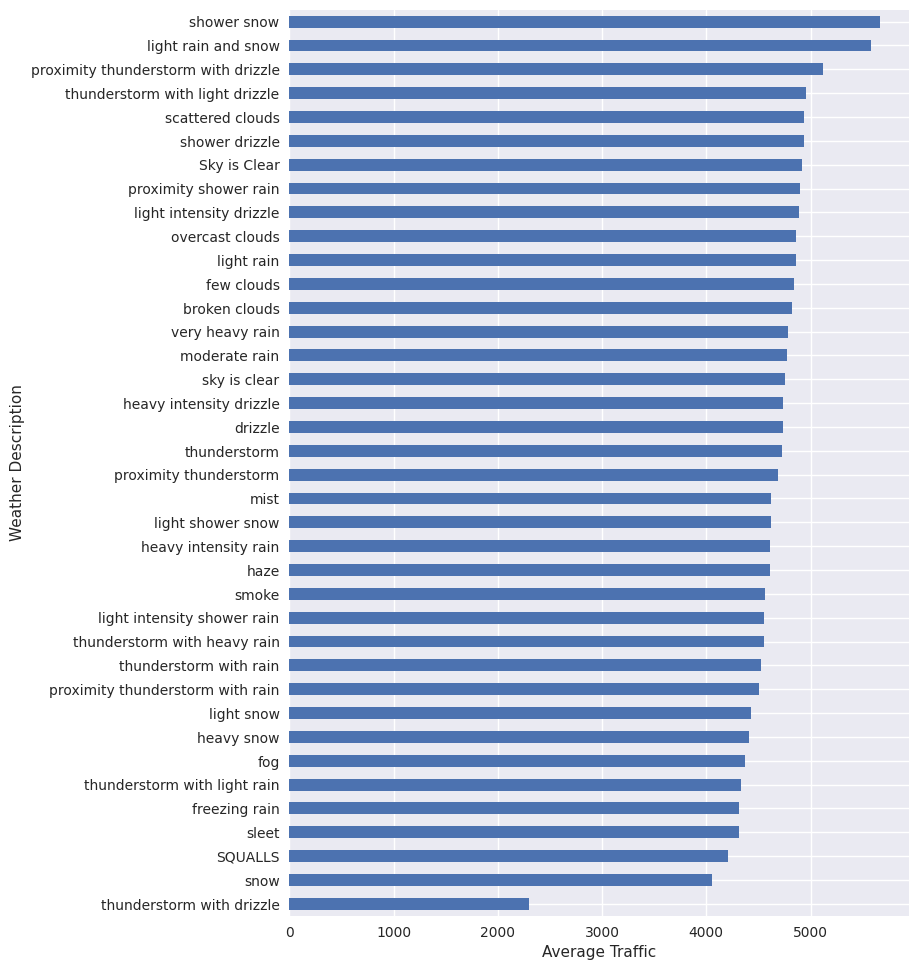

In [20]:
by_weather_description = traffic_day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].sort_values().plot.barh(figsize=(8, 12))
plt.xlabel('Average Traffic')
plt.ylabel('Weather Description')
plt.show()

There are two weather types where traffic volume exceeds 5,000:
- Shower snow
- Light rain and snow
- Proximity thunderstorm with dizzle

This is bad weather, but not extremely bad. Probably in such weather people are more likely to drive a car than, for example, a bicycle.

## Conclusion for Daytime Data

In the project we're trying to find a few indicators of heavy traffic on the east-west I-94 Interstate highway. We achieved this goal by finding two types of indicators:
- **Time indicators:**
    - The traffic is heavier during warm months (March - October) compared to cold months (November – February).
    - The traffic is heavier on business days compared to the weekends.
    - On business days, the rush hours are around 7 and 16.
- **Weather indicators:**
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with dizzle

## Nighttime Data

Now let's analyze nighttime data.

### Time Indicators for Nightime - Month

Firstly, we're going to get the average traffic volume for each month.

In [21]:
traffic_night['month'] = traffic_night['date_time'].dt.month
by_month_night = traffic_night.groupby('month').mean()
by_month_night['traffic_volume']

month
1     1616.610448
2     1716.961841
3     1817.272029
4     1786.116598
5     1829.852518
6     1932.272727
7     1838.349193
8     1897.564079
9     1818.959858
10    1852.168591
11    1680.311799
12    1622.508393
Name: traffic_volume, dtype: float64

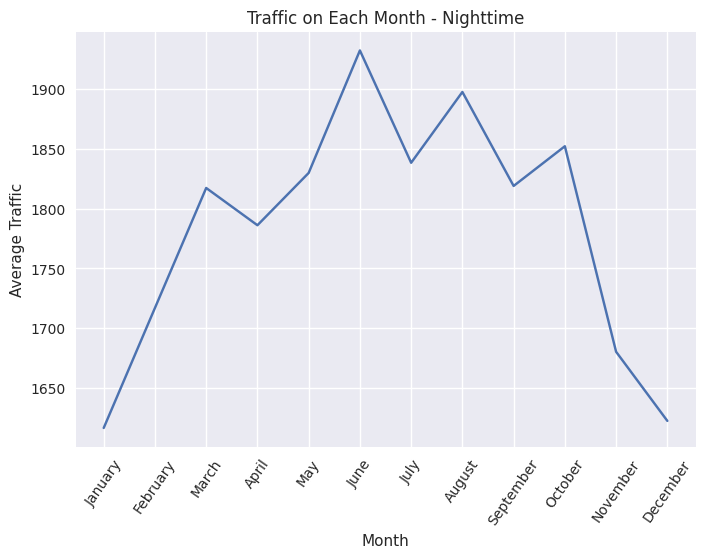

In [22]:
plt.plot(by_month_night['traffic_volume'])
plt.xticks(rotation=55,
           ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
           labels=['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Traffic on Each Month - Nighttime')
plt.xlabel('Month')
plt.ylabel('Average Traffic')
plt.show()

The traffic at night is less intense during cold months (November – February), and much heavier during warmer months (March – October). Compared to daytime data, we can see here more irregularities in warmer months. It might be caused by greater intensity of road repairs at night in some months (we already know from daytime analysis that significant decrease in traffic volume during July 2016 was connected with I-94/Hwy 29 interchange construction in Alexandria).

### Time Indicators for Nighttime - Day of the Week

Let's plot some line plots for another time unit: day of the week.

In [23]:
traffic_night['dayofweek'] = traffic_night['date_time'].dt.dayofweek
by_dayofweek_night = traffic_night.groupby('dayofweek').mean()
by_dayofweek_night['traffic_volume']   # 0 is Monday, 6 is Sunday

dayofweek
0    1722.532692
1    1862.926571
2    1901.465710
3    1994.177959
4    2059.882336
5    1634.459412
6    1323.998273
Name: traffic_volume, dtype: float64

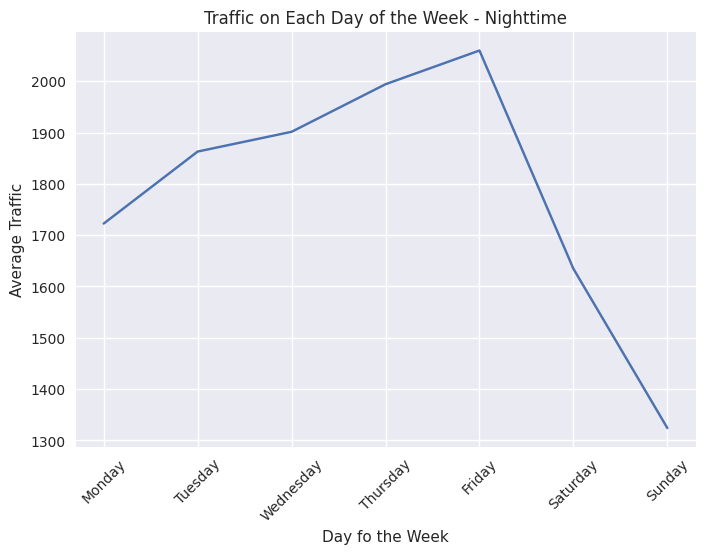

In [24]:
plt.plot(by_dayofweek_night['traffic_volume'])
plt.xticks(rotation=45,
            ticks=[0, 1, 2, 3, 4, 5, 6],
            labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Traffic on Each Day of the Week - Nighttime')
plt.xlabel('Day fo the Week')
plt.ylabel('Average Traffic')
plt.show()

During business days (Monday - Friday) traffic volume is significantly heavier. Traffic is increasing from Monday (about 1,700 cars/hr) to Friday (above 2,050 cars/hr). Traffic is much lighter during weekends (below 1,650 cars/hr).

### Time Indicators for Nighttime - Time of Day

Now we'll generate a line plot for the time of day. We'll look at the averages separately for business day and weekend.

In [25]:
business_days_n = traffic_night.copy()[traffic_night['dayofweek'] <= 4]    # 4 == Friday
weekend_n = traffic_night.copy()[traffic_night['dayofweek'] >= 5]          # 5 == Saturday
by_hour_business_n = business_days_n.groupby('hour').mean()
by_hour_weekend_n = weekend_n.groupby('hour').mean()

sorter = [19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6]
by_hour_business_n = by_hour_business_n.reindex(sorter)
by_hour_weekend_n = by_hour_weekend_n.reindex(sorter)

by_hour_business_n.index = by_hour_business_n.index.map(str)
by_hour_weekend_n.index = by_hour_weekend_n.index.map(str)

print(by_hour_business_n['traffic_volume'])
print(by_hour_weekend_n['traffic_volume'])

hour
19    3298.340426
20    2842.433004
21    2673.042807
22    2125.913104
23    1379.549728
0      651.528971
1      396.913043
2      301.982818
3      362.289835
4      832.661096
5     2701.296703
6     5365.983210
Name: traffic_volume, dtype: float64
hour
19    3220.234120
20    2815.039216
21    2658.445242
22    2384.368607
23    1699.050699
0     1306.414035
1      805.128333
2      611.171986
3      393.611599
4      375.420168
5      639.237232
6     1089.100334
Name: traffic_volume, dtype: float64


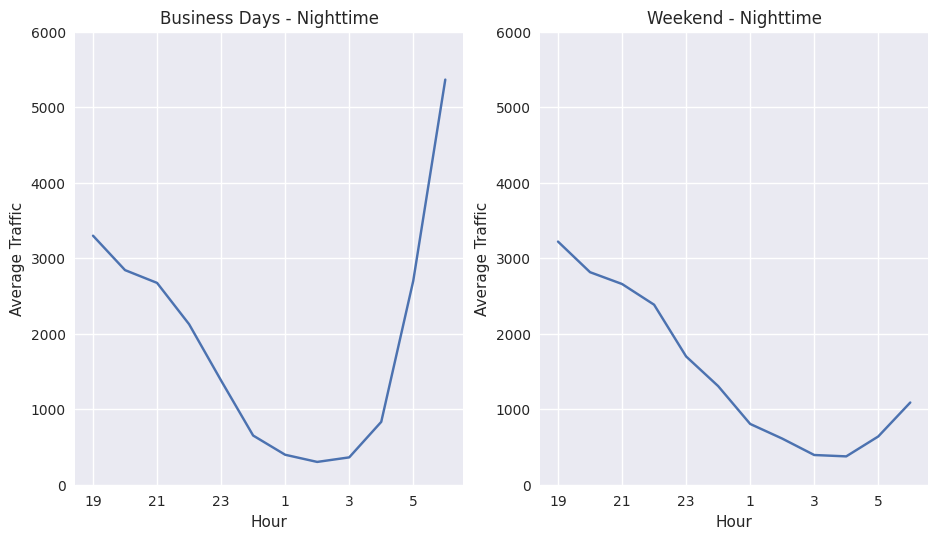

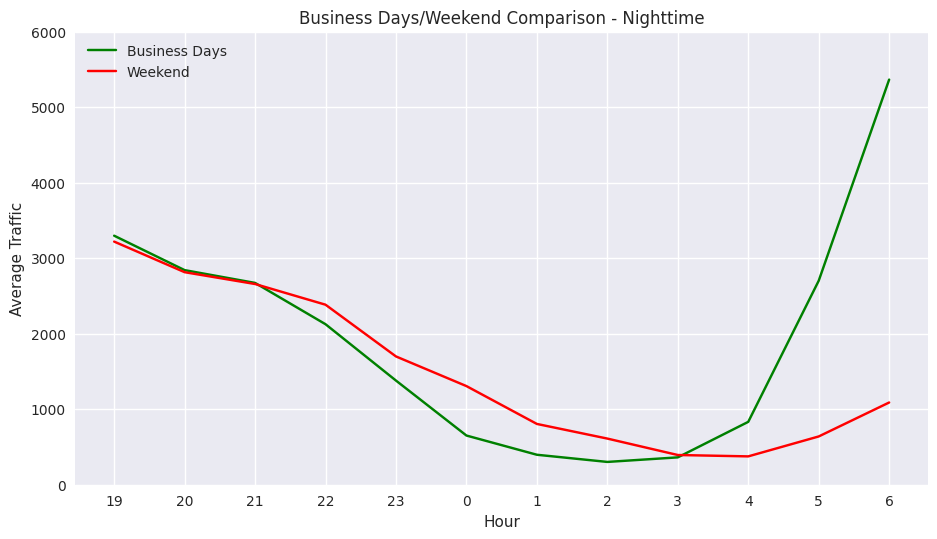

In [26]:
plt.figure(figsize=(11, 6))

plt.subplot(1, 2, 1)
by_hour_business_n['traffic_volume'].plot.line()
plt.title('Business Days - Nighttime')
plt.xlabel('Hour')
plt.ylabel('Average Traffic')
plt.ylim([0, 6000])

plt.subplot(1, 2, 2)
by_hour_weekend_n['traffic_volume'].plot.line()
plt.title('Weekend - Nighttime')
plt.xlabel('Hour')
plt.ylabel('Average Traffic')
plt.ylim([0, 6000])

plt.show()

plt.figure(figsize=(11, 6))

plt.plot(by_hour_business_n['traffic_volume'], color='green', label='Business Days')
plt.plot(by_hour_weekend_n['traffic_volume'], color='red', label='Weekend')
plt.legend()
plt.title('Business Days/Weekend Comparison - Nighttime')
plt.xlabel('Hour')
plt.ylabel('Average Traffic')
plt.ylim([0, 6000])

plt.show()

Between 21 and 3 traffic is higher during weekends. This is probably due to the fact that in general people aren't working on weekends and can drive somewhere overnight. On business days, after 3 o'clock, traffic starts to grow significantly. These is due to the fact that on business days the rush hours are in the morning (people drive to work/school).

Let's check if there are any significant differences for each business day and for each weekend day.

(0.0, 7000.0)

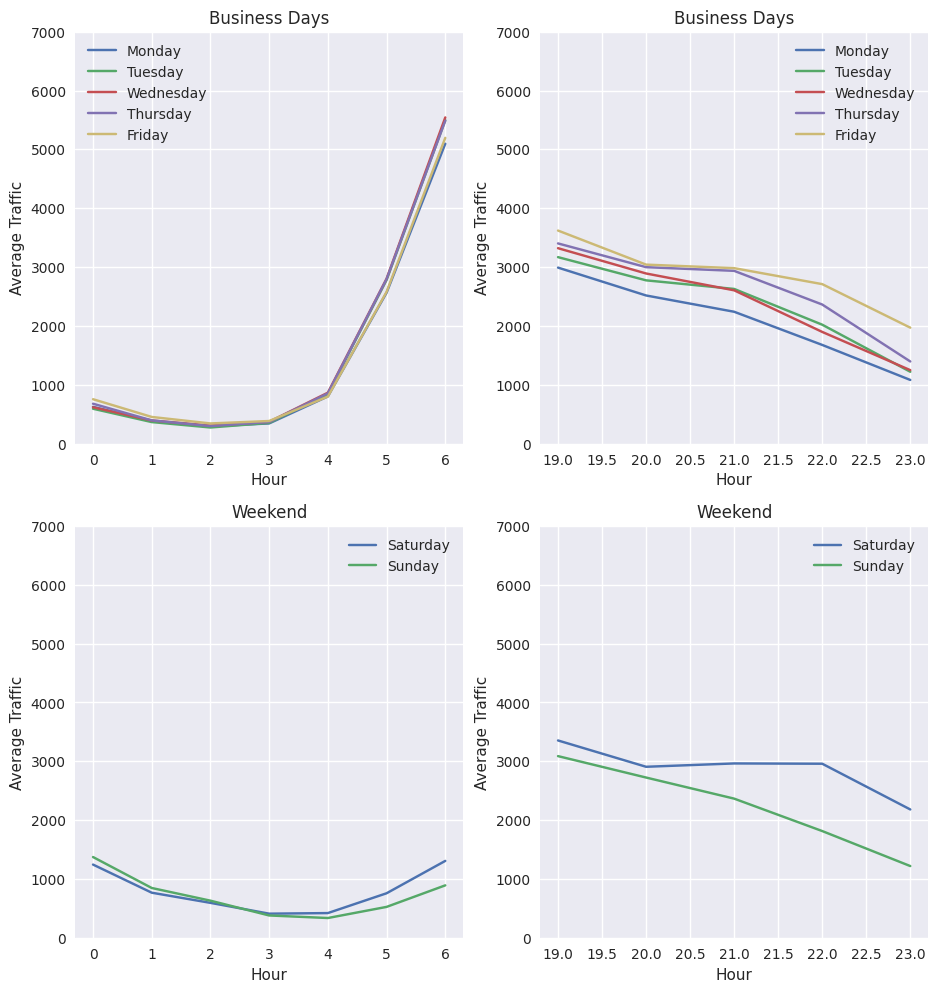

In [27]:
### weekday_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

plt.figure(figsize=(11, 12))

plt.subplot(2, 2, 1)
for day in range(0, 5):
    weekday = traffic_night[(traffic_night['dayofweek'] == day) & (traffic_night['hour'] < 7)]
    plt.plot(weekday.groupby('hour').mean()['traffic_volume'], label=weekday_dict[day])
    
plt.legend()
plt.title('Business Days')
plt.xlabel('Hour')
plt.ylabel('Average Traffic')
plt.ylim([0, 7000])
    
plt.subplot(2, 2, 2)
for day in range(0, 5):
    weekday = traffic_night[(traffic_night['dayofweek'] == day) & (traffic_night['hour'] >= 19)]
    plt.plot(weekday.groupby('hour').mean()['traffic_volume'], label=weekday_dict[day])
    
plt.legend()
plt.title('Business Days')
plt.xlabel('Hour')
plt.ylabel('Average Traffic')
plt.ylim([0, 7000])
    
plt.subplot(2, 2, 3)
for day in range(5, 7):
    weekday = traffic_night[(traffic_night['dayofweek'] == day) & (traffic_night['hour'] < 7)]
    plt.plot(weekday.groupby('hour').mean()['traffic_volume'], label=weekday_dict[day])

plt.legend()
plt.title('Weekend')
plt.xlabel('Hour')
plt.ylabel('Average Traffic')
plt.ylim([0, 7000])
    
plt.subplot(2, 2, 4)
for day in range(5, 7):
    weekday = traffic_night[(traffic_night['dayofweek'] == day) & (traffic_night['hour'] >= 19)]
    plt.plot(weekday.groupby('hour').mean()['traffic_volume'], label=weekday_dict[day])
    
plt.legend()
plt.title('Weekend')
plt.xlabel('Hour')
plt.ylabel('Average Traffic')
plt.ylim([0, 7000])

We can see that plot lines for business days have similar shapes. The highest traffic between 19 and 23 is on Friday. The reason behind this could be people who are going for the weekend trips, or students returning to their homes for the weekend.

Plot lines for Saturday and Sunday are similar to each other between 0 and 6. Between 19 and 23 on Saturday, in each hour, traffic is higher than during Sunday (400 - 1,200 difference).

## Time Indicators - Summary

We've found a few time-related indicators of heavy traffic in nighttime:

- The traffic is heavier during warm months (March – October) compared to cold months (November – February).
- After 3 o'clock the traffic is heavier on business days. Between 21 and 3 it's heavier during the weekends.
- On business days, the rush hours are in the morning (between 5 and 6). 
- On business days, after 19 o'clock, the highest traffic is on Friday.
- During the weekends, after 19 o'clock, the highest traffic is on Saturday.

## Weather Indicators

Another possible indicator of heavy traffic is weather.

In [28]:
traffic_night.corr()['traffic_volume']

temp              0.094004
rain_1h          -0.012972
snow_1h          -0.007453
clouds_all        0.012832
traffic_volume    1.000000
hour              0.454586
month             0.001342
dayofweek        -0.073636
Name: traffic_volume, dtype: float64

The strongest correlation is between temperature and traffic volume with a value of +0.09. The other columns (rain_1h, snow_1h, clouds_all) don't show any strong correlation with traffic_value.

Let's generate a scatter plot to visualize the correlation between temp and traffic_volume.

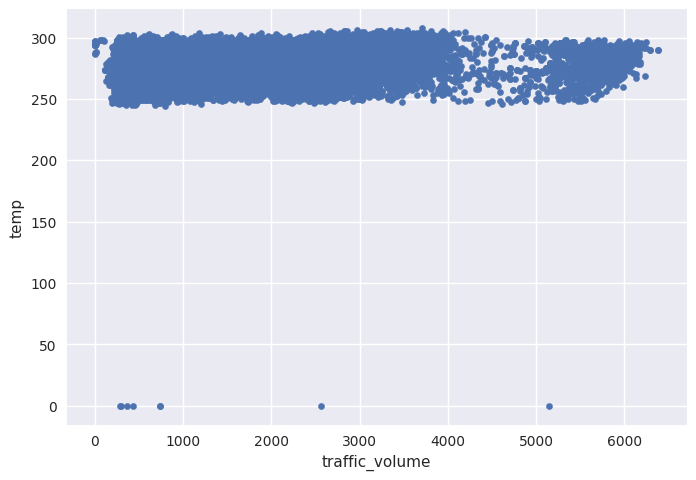

In [29]:
traffic_night.plot.scatter('traffic_volume', 'temp')

(220.0, 320.0)

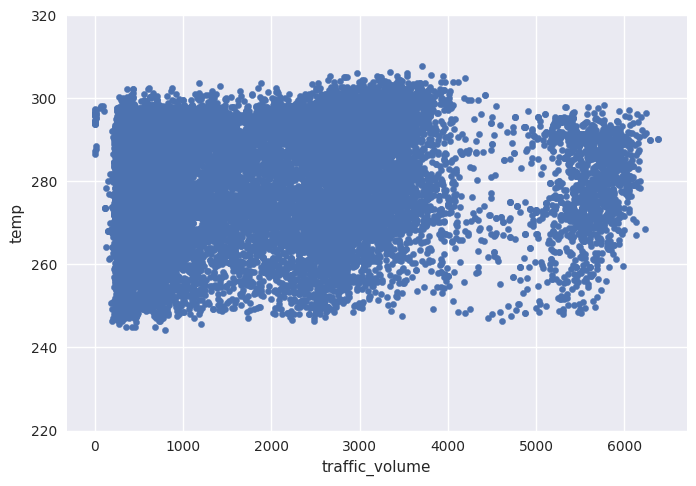

In [31]:
traffic_night.plot.scatter('traffic_volume', 'temp')
plt.ylim([220, 320])

Same as for daytime, temperature doesn't look like a reliable indicator of heavy traffic.

Let's now look at the other weather-related columns: `weather_main` and `weather_description`.

### Weather Types

We're going to group the data by `weather_main` and look at the `traffic_volume` averages.

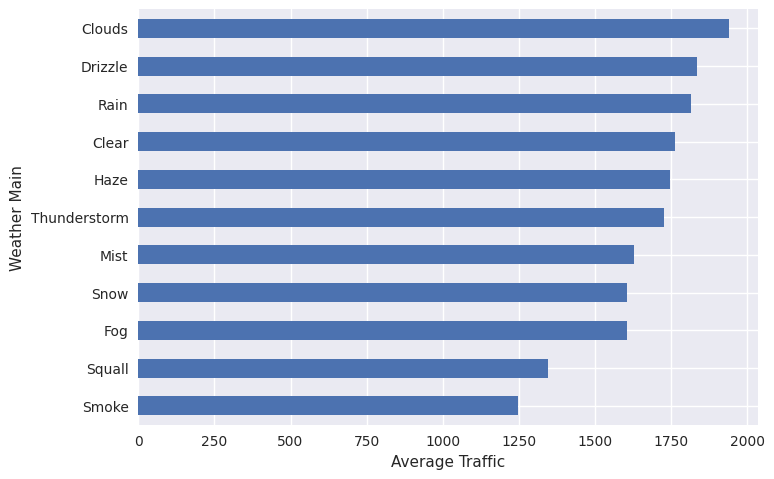

In [32]:
by_weather_main_n = traffic_night.groupby('weather_main').mean()
by_weather_main_n['traffic_volume'].sort_values().plot.barh()
plt.xlabel('Average Traffic')
plt.ylabel('Weather Main')
plt.show()

There's no weather type where traffic volume exceeds 2,000 cars. The smallest bars are for Squall and Smoke.

Now let's group out dataset by `weather_description`, which has a more granular weather classification.

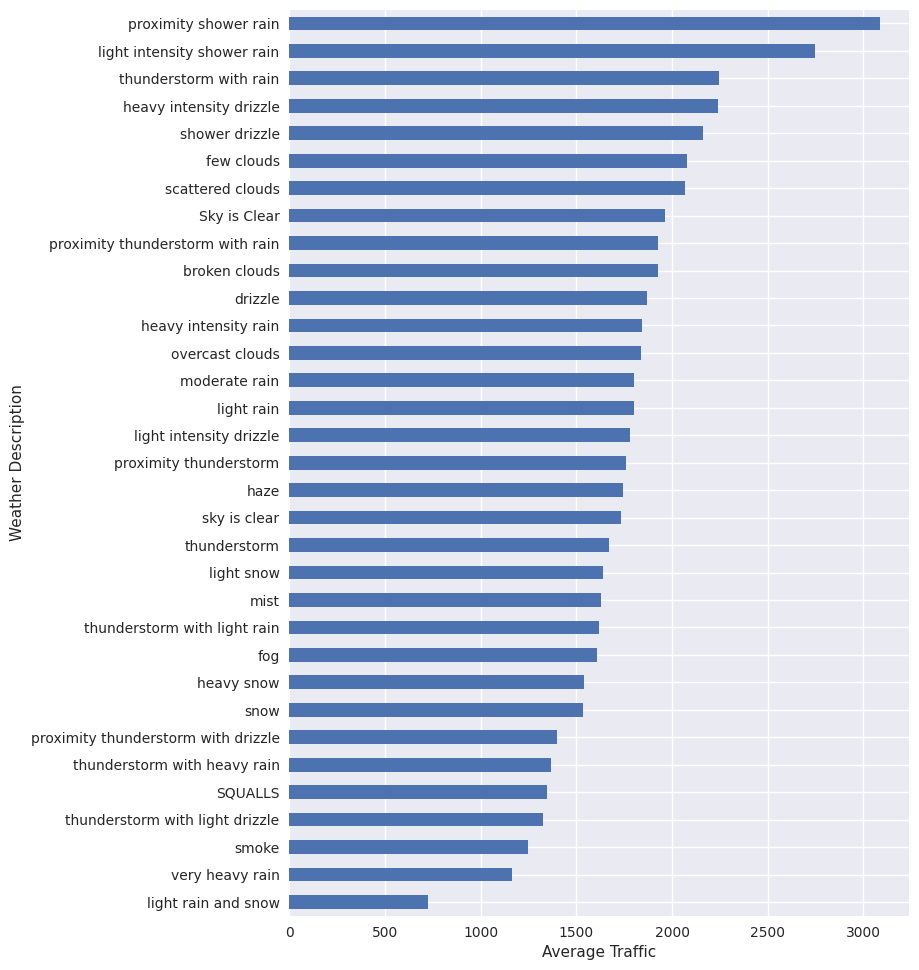

In [33]:
by_weather_description_n = traffic_night.groupby('weather_description').mean()
by_weather_description_n['traffic_volume'].sort_values().plot.barh(figsize=(8, 12))
plt.xlabel('Average Traffic')
plt.ylabel('Weather Description')
plt.show()

There are two weather types where traffic volume exceeds 2,500:

- Proximity shower rain
- Light intensity shower rain

## Conclusion for Nighttime Data

For nighttime we've found the following traffic indicators:

- **Time indicators:**
    - The traffic is heavier during warm months (March – October) compared to cold months (November – February).
    - After 3 o'clock the traffic is heavier on business days. Between 21 and 3 it's heavier during the weekends.
    - On business days, the rush hours are in the morning (between 5 and 6).
    - On business days, after 19 o'clock, the highest traffic is on Friday.
    - During the weekends, after 19 o'clock, the highest traffic is on Saturday.
    
- **Weather indicators:**
    - Proximity shower rain
    - Light intensity shower rain